In [1]:
!git clone https://github.com/brendenlake/omniglot.git
!unzip omniglot/python/images_background.zip 

Cloning into 'omniglot'...
remote: Counting objects: 67, done.
remote: Total 67 (delta 0), reused 0 (delta 0), pack-reused 67
Unpacking objects: 100% (67/67), done.


In [12]:
import tensorflow as tf
import pandas as pd
import numpy as np
import cv2
import os.path

from PIL import Image
from tensorflow.python import keras
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt


train_x = np.zeros((19280,105,105))
print(train_x.shape)
train_y = np.zeros((19280))

print(train_x.shape)

i=0
arc = os.path.join("images_background")
for alphabet in os.listdir(arc):
    for characters in os.listdir(os.path.join(arc,alphabet)):
        for sub in os.listdir(os.path.join(arc,alphabet,characters)):
            path = os.path.join(arc,alphabet,characters,sub)
            img = Image.open(path)
            train_x[i,:,:] = np.asarray(img.getdata()).reshape(img.size)
            train_y[i] = int(path[path.find('.png')-7:path.find('.png')-3])
            #print(train_y[i])
            i += 1     

(19280, 105, 105)
(19280, 105, 105)


images_background/Arcadian/character12/0012_14.png
12


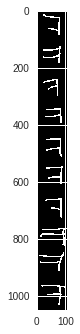

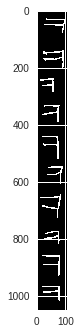

In [42]:
plt.figure(100)
class_num = 679
plt.imshow(train_x[np.where(train_y==class_num)][0:10].reshape(105*10,105))

plt.figure(101)
plt.imshow(train_x[np.where(train_y==class_num)][10:20].reshape(10*105,105))
print(path)
print(int(path[path.find('.png')-7:path.find('.png')-3]))


In [56]:
model = tf.keras.Sequential()

#convolution layer 1
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=2,padding='same',
                                 activation='relu',input_shape=(105,105,1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2)))
model.add(tf.keras.layers.Dropout(0.3))

#convolution layer 2
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=2,padding='same',
                                 activation='relu',))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2)))
model.add(tf.keras.layers.Dropout(0.2))

#dense
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(256,activation='sigmoid'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(10,activation='softmax'))


model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer ='adam')

conv = model.predict(train_x[0].reshape(1,105,105,1))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 105, 105, 64)      320       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 52, 52, 64)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 52, 52, 64)        0         
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


(1, 52, 52, 64)


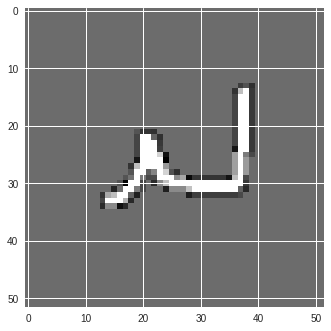

In [66]:
print(conv.shape)
plt.imshow(conv.sum(axis=3).reshape(conv.shape[1],conv.shape[2]))

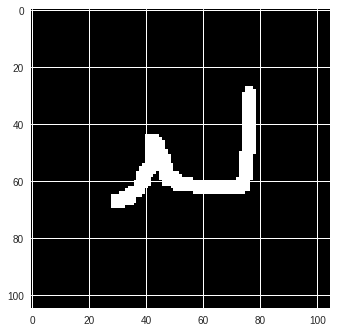

In [68]:
plt.imshow(train_x[0])